# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [64]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [65]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# Open a Chrome window using Splinter
browser = Browser('chrome')
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [66]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [67]:
# Extract all rows of data
# Extract the table
table = soup.find('table')    
# Extract the rows 
rows = table.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [68]:
# Create an empty list for the rows
list_rows = []

# Create an empty list for the name of columns
list_column = []    

# Loop through the scraped data to create a list of rows
for r in rows:
    # Look for the list of cells
    cel = r.find_all('td')
    # Look for the name of columns
    column_names = r.find_all('th')
        
    # Extract the names and add them to the list_column
    for column_name in column_names:
        list_column.append(column_name.get_text(strip=True))
        
    # Extract the values of cells and add them to the list_rows
    cell_values = [cell.get_text() for cell in cel]
    list_rows.append(cell_values)

# Print the list of columns names and the content of each row
print("Column Names:", list_column)
print("Data Rows:", list_rows)



Column Names: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
Data Rows: [[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03',

In [69]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list_rows, columns=list_column)
df=df.dropna()
len(df)

1867

In [70]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [71]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [72]:
# Change data types for data analysis
df = df.astype({'sol': int, 'ls': int, 'month': int, 'min_temp': float,
                'pressure': float})
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [73]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [74]:
# 1. How many months are there on Mars?
# Number of months on Mars
nbr_month= df['month'].nunique()

# Occurrences of each month in order by month
occ_month = df['month'].value_counts()
sorted_occ_month = occ_month.sort_index()

# Display the results
print(sorted_occ_month)
print('The number of months in Mars is',nbr_month)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64
The number of months in Mars is 12


In [75]:
# 2. How many Martian days' worth of data are there?
# Number of days' worth of data
nbr_day = df['id'].nunique()
nbr_day

1867

In [76]:
# 3. What is the average low temperature by month?
# Average low temperature by month
avg_temp = df.groupby('month')['min_temp'].mean()

# Sort the result by month
sorted_avg_temp= avg_temp.sort_index()

# Display the result
print(sorted_avg_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


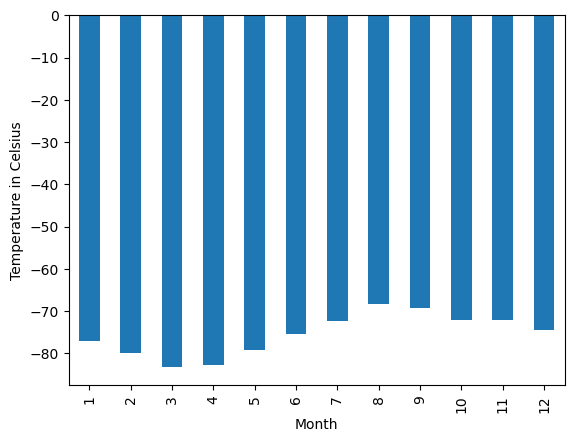

In [77]:
# Plot the average temperature by month
avg_temp=pd.DataFrame(sorted_avg_temp)
avg_temp['min_temp'].plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

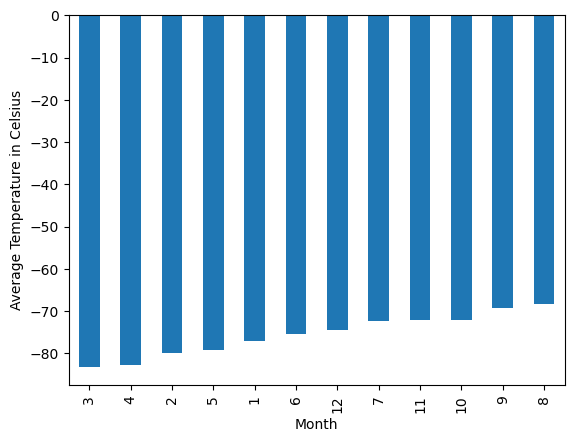

The coldest month is  3 and the temperature is equal to  -83.30729166666667
The hottest month is  8 and the temperature is equal to  -68.38297872340425


In [90]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the DataFrame
sorted_avg_temp_df = avg_temp.sort_values(by='min_temp')

# Plot the average temperature by month in order to look for the Minimum and Maximum
# Create a bar plot using the sorted DataFrame
sorted_avg_temp_df.plot(kind='bar', legend=None)
plt.xlabel('Month')
plt.ylabel('Average Temperature in Celsius')
plt.savefig('temp.png')
plt.show()

# Look for the coldest and the hottest months with their temperature
min_avg_temp = sorted_avg_temp.min()
max_avg_temp = sorted_avg_temp.max()
month_min_temp = sorted_avg_temp.idxmin()
month_max_temp = sorted_avg_temp.idxmax()

# Display results
print('The coldest month is ', month_min_temp, 'and the temperature is equal to ',min_avg_temp)
print('The hottest month is ', month_max_temp, 'and the temperature is equal to ',max_avg_temp)


In [83]:
# 4. Average pressure by Martian month
# Look for the Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

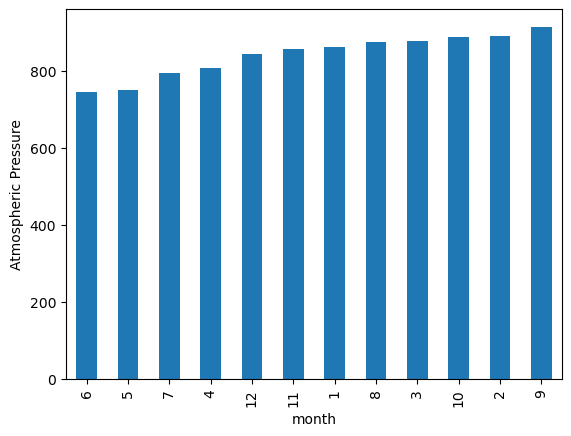

Minimum pressure:  745.0544217687075  Month associated:  [6]
Maximum pressure:  913.3059701492538  Month associated [9]


In [91]:
# Identify the lowest and heighest pressure

# Create and sort the dataframe
avg_pressure_df = pd.DataFrame(avg_pressure)
sorted_avg_pressure = avg_pressure_df.sort_values(by='pressure')

# Plot the average pressure by month in order to look for the Minimum and Maximum
# Create a bar plot using the sorted DataFrame
sorted_avg_pressure.plot(kind = 'bar',legend=None)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.savefig('pressure.png')
plt.show()

# Look for the Minimum  and Maximum pressure with their months
avg_pressure_df = avg_pressure.reset_index().rename(columns={'pressure': 'mean_pressure'})
min_pressure = avg_pressure_df ['mean_pressure'].min()
max_pressure = avg_pressure_df ['mean_pressure'].max()
min_month = avg_pressure_df [avg_pressure_df ['mean_pressure'] == min_pressure]['month']
max_month = avg_pressure_df [avg_pressure_df ['mean_pressure'] == max_pressure]['month']

# Display the results
print('Minimum pressure: ', min_pressure, ' Month associated: ', min_month.tolist())
print('Maximum pressure: ', max_pressure," Month associated", max_month.tolist())





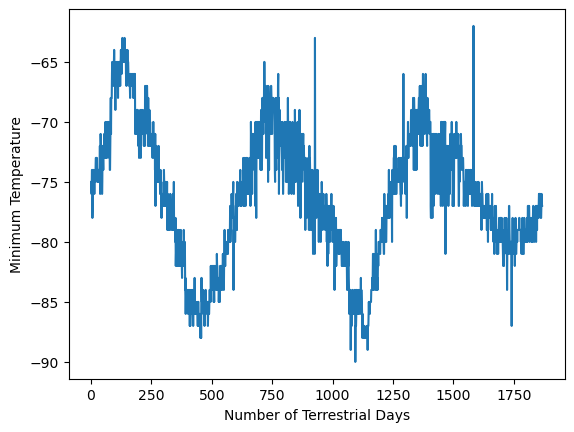

The number of days in one year in Mars is  687


In [94]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Number of days in one year on Mars

# Plot to look for the distance between two peaks of the temperature
df.plot(y = 'min_temp', legend=None)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.savefig('nbr_j.png')
plt.show()

# One year in Mars means when the ls (Solar Longitude) is the same between two dates
 
# Save the first value from the column ls
first_value = df['ls'].iloc[0]
# Save the date of the first value from the column terrestrial_date
date1 = df['terrestrial_date'].iloc[0]

# Look for the index of the matching value of the saved one(1 year)
matching_index = df[df['ls'] == first_value].index
# Extract the first matching index from the list 
first_matching_index = matching_index[1]
# Look for the date of the matching index
date2 = df['terrestrial_date'].iloc[first_matching_index]

# Look for the number of days between the two dates
nbr_j=date2-date1
# Exctract the number of days
nbr_j=nbr_j.days

# Display the result
print('The number of days in one year in Mars is ',nbr_j)



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [93]:
# Write the data to a CSV
df.to_csv('Mars_data.csv')

In [ ]:
browser.quit()